# Problems with the Arithmetic Mean

The **arithmetic mean** (or simple average) is a fundamental tool in statistics, but it can be highly misleading because it is **extremely sensitive to outliers**.

Because the formula for the mean involves summing *every* single value in a dataset, one unusually large or small number can "pull" the average away from the center.

### 1. Sensitivity to Outliers

An outlier is a data point that is significantly different from the rest. In your current dataset:
**[11, 1, 3, 5, 6, 12, 15, 17, 20, 26, 27, 28, 23, 31, 37, 39, 43, 42, 51, 58, 54, 67, 78, 88, 89, 83, 91, 92, 1330]**
have weights mostly between 1 and 92, but one value is **1330**.

* **Without the outlier (1330):** The average is approximately **41**.
* **With the outlier (1330):** The average spikes to **86**.

In this case, **86** is not a "typical" weight; it is higher than 27 out of the 29 numbers in your list. The mean has been "distorted" by a single extreme value.

### 2. The Problem with Skewed Data

The mean fails when data is "skewed" (bunched up on one side with a long tail on the other). A classic example is **household income**:

* If 9 people earn $30,000 and 1 person earns $1,000,000,000, the **mean** income would be over $100 million.
* Reporting that the "average" person makes $100 million is technically true but practically useless.

### 3. Comparison of Central Tendencies

| Feature | Arithmetic Mean | Median (Middle Value) |
| --- | --- | --- |
| **Sensitivity** | Highly sensitive to outliers. | Robust; ignores extreme values. |
| **Data Usage** | Uses every value in the calculation. | Only considers the center position. |
| **Best Use Case** | Symmetric data with no outliers. | Skewed data or data with outliers. |

---

### Summary of Demerits

* **Outlier Distortion:** One extreme value can pull the mean away from the "bulk" of the data.
* **Skewness:** In non-symmetrical data (like wealth), the mean provides a "false" sense of the middle.
* **Non-Existent Values:** The mean often results in a number that doesn't exist in the set (e.g., the average family having 2.4 children).




# EXAMPLE: Problem with Arithematic Mean

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
tempData = [11, 1, 3, 5, 6, 12, 15, 17, 20, 26, 27, 28, 23, 31, 37, 39, 43, 42, 51, 58, 54, 67, 78, 88, 89, 83, 91, 92, 1330]

In [24]:
np.array(tempData)

array([  11,    1,    3,    5,    6,   12,   15,   17,   20,   26,   27,
         28,   23,   31,   37,   39,   43,   42,   51,   58,   54,   67,
         78,   88,   89,   83,   91,   92, 1330])

In [25]:
weights = np.array(tempData)

In [26]:
np.mean(weights)

np.float64(85.06896551724138)



# **ARITHEMATIC MEAN vs MEDIAN Comparison:**
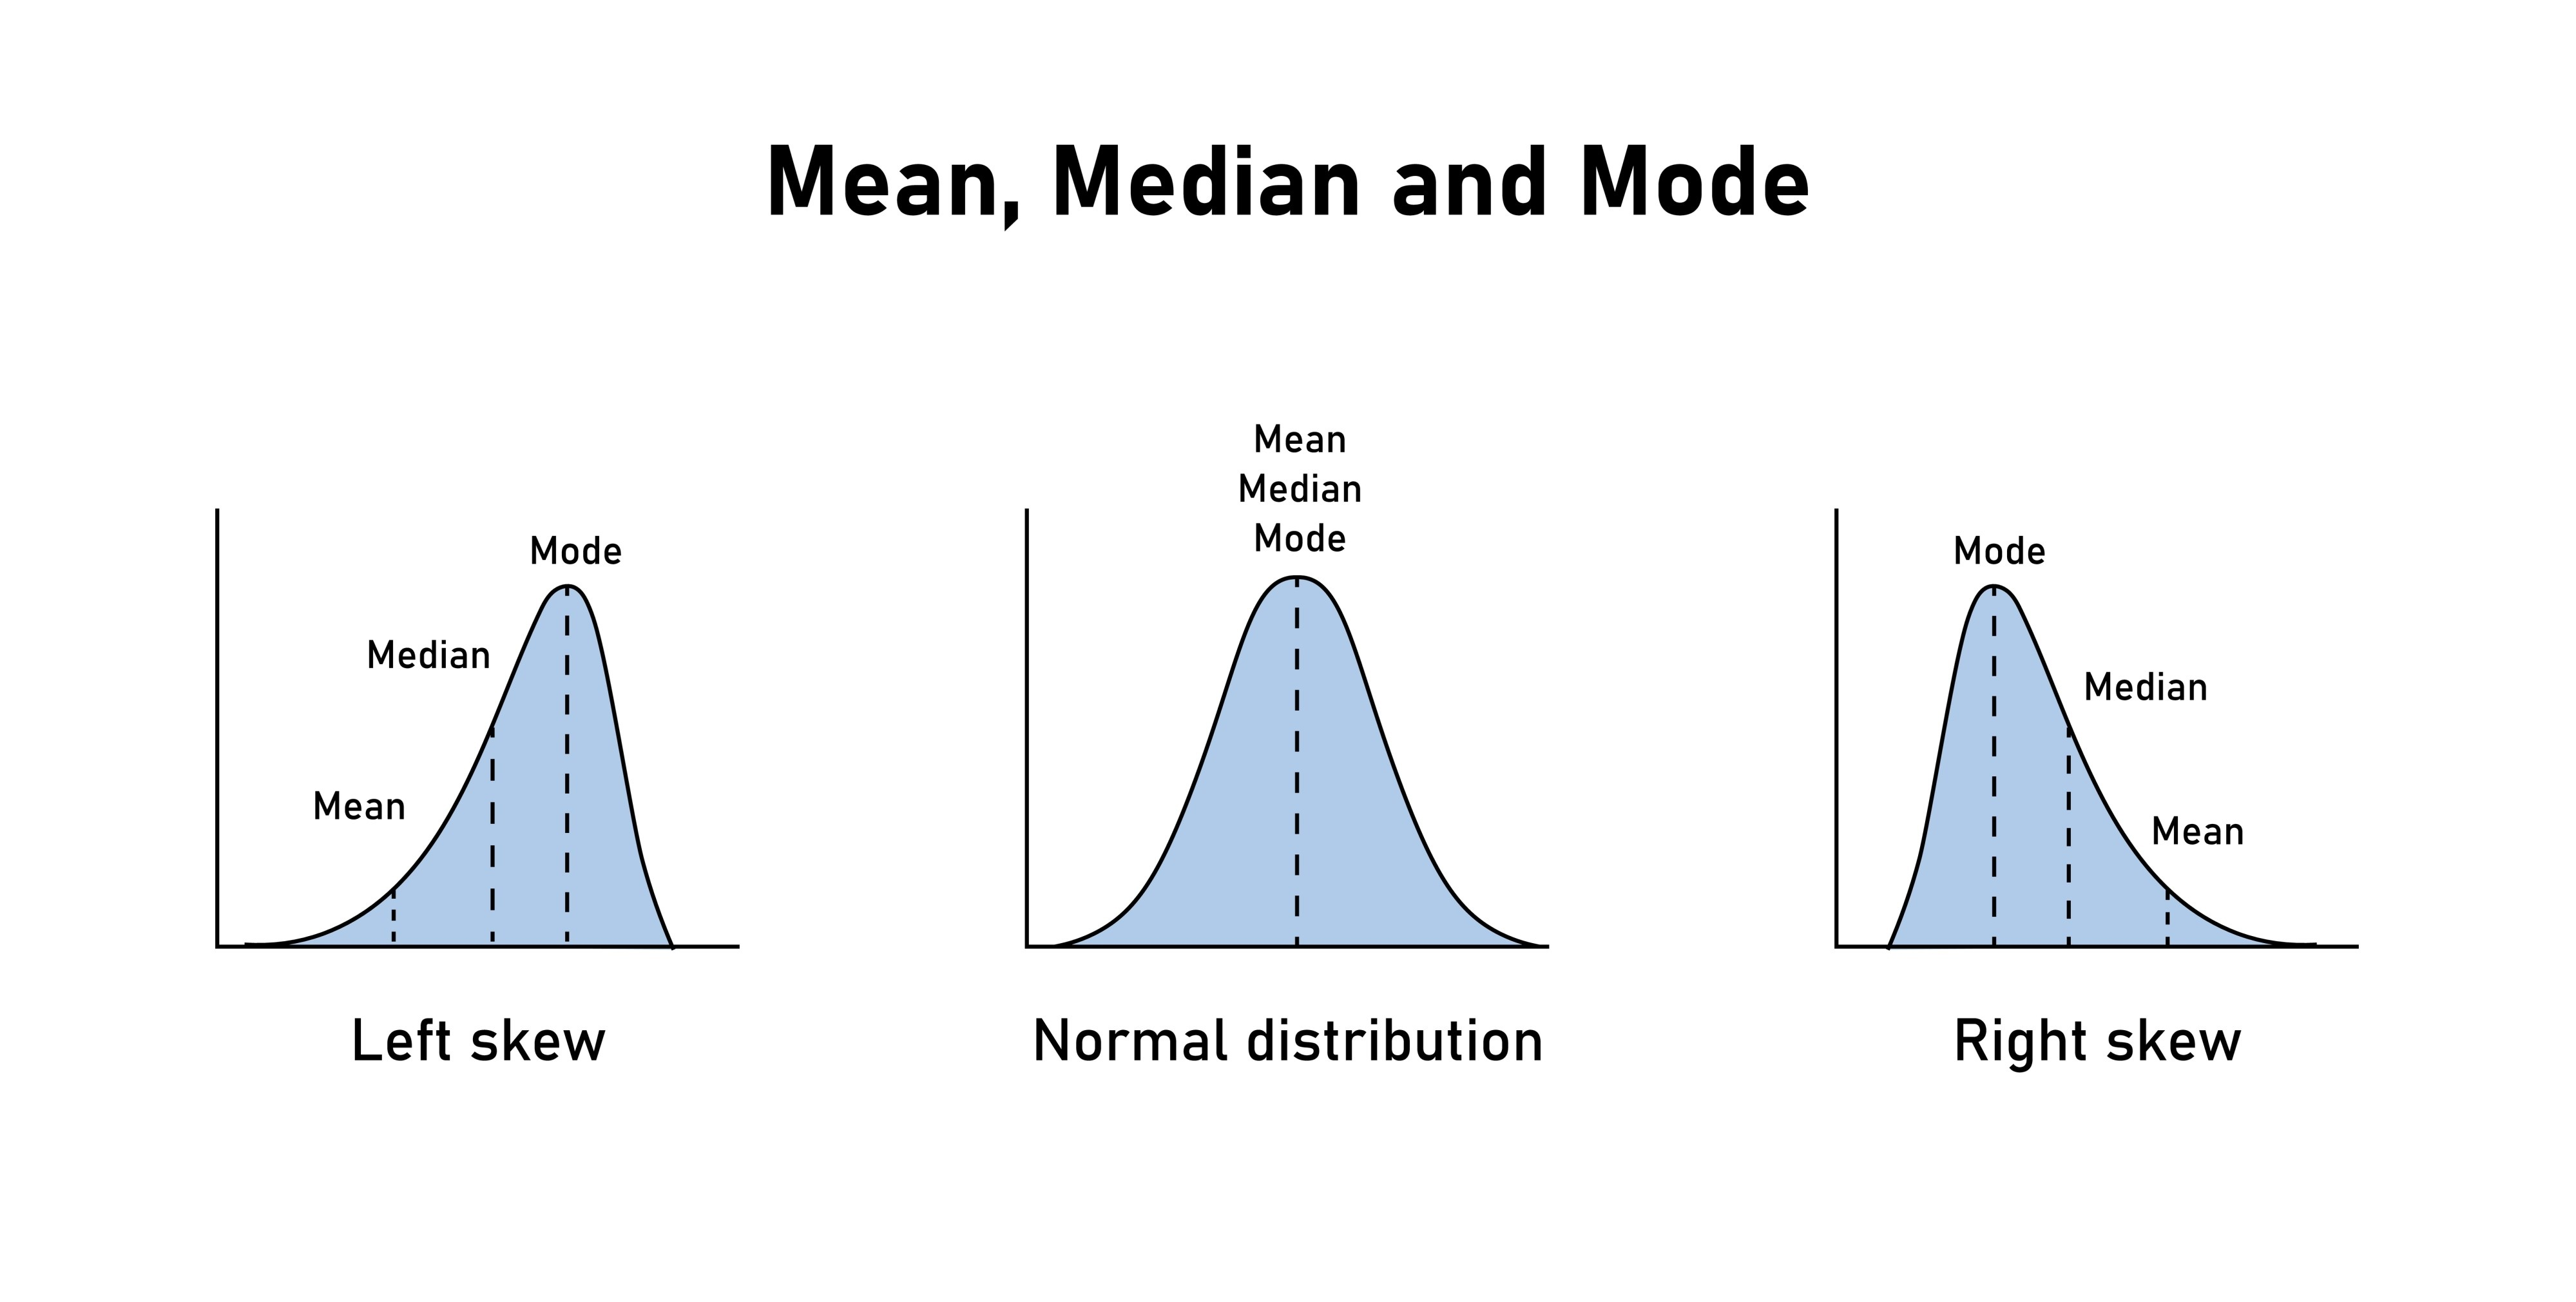

In [17]:
mean_val

np.float64(85.06896551724138)

In [28]:
mean_val = np.mean(weights) #calculating mean

median_val = np.median(weights) #calculating median

In [29]:
median_val

np.float64(37.0)

In [30]:
print(f"Difference: {mean_val - median_val:.2f}")

Difference: 48.07


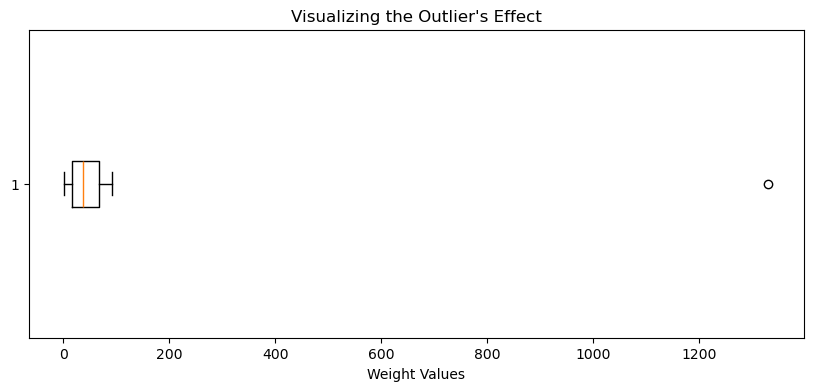

In [31]:


plt.figure(figsize=(10, 4))
plt.boxplot(weights, vert=False)
plt.title("Visualizing the Outlier's Effect")
plt.xlabel("Weight Values")
plt.show()

# Handling Outliers: Data Cleaning
When the arithmetic mean is skewed by extreme values, we have two primary options:

# 1. Trimming (Removing) Outliers
Think of this like a "Refusing to count the Giant" rule. We decide that any data point that is way too far away from the others is probably a mistake or a rare exception that ruins our math.

The Tool: We use the Interquartile Range (IQR).

How it works: We look at where the "middle 50%" of your data sits (the "box" in your boxplot). We then draw a "fence" a certain distance away from that box.

The Action: Anything outside those fences (like your value of 1330) is kicked out of the dataset.

The Result: Once the giant is gone, the mean of the remaining students becomes 5 feet again. This is much more accurate for the group.

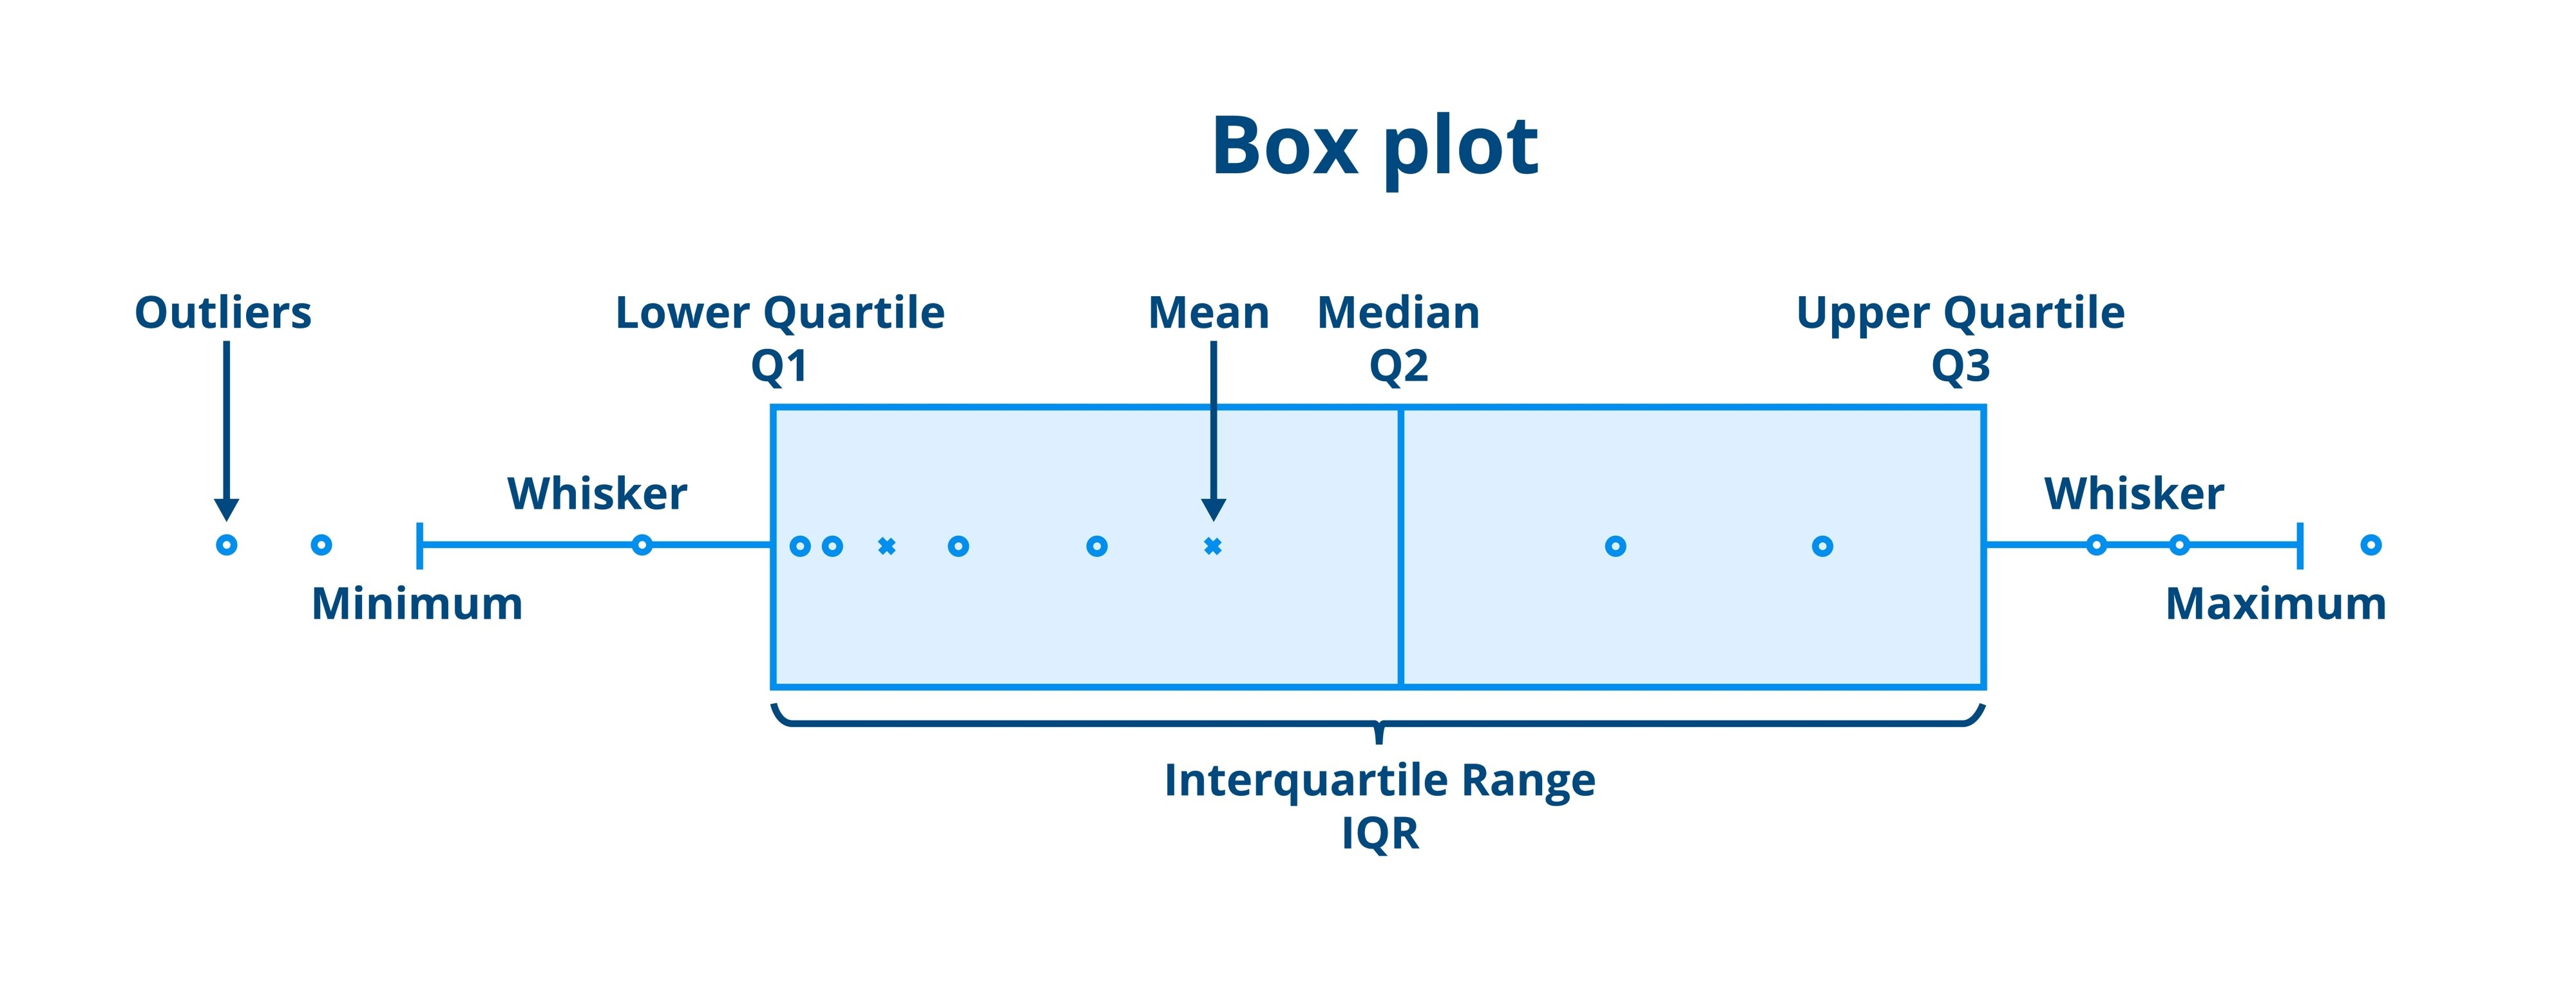

# 2. Robust Statistics
Think of this like "The Middle-Man" rule. Instead of adding everyone up, we just line everyone up from shortest to tallest and pick the person standing exactly in the middle.

The Tool: The Median.

How it works: If you have 5 people, the Median is the height of the 3rd person in line.

The Benefit: It doesn't matter if the tallest person is 6 feet tall or 100 feet tall; they are still just "the person at the end of the line." The person in the middle stays the same.

The Result: The Median is "Robust," meaning it is tough and doesn't get pushed around by one or two crazy numbers.

In [32]:
# 1. Calculate the 'Box' (Middle 50% of data)
Q1 = np.percentile(weights, 25)
Q3 = np.percentile(weights, 75)
IQR = Q3 - Q1

# 2. Define the 'Fences'
lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR

# 3. Filter the Data
cleaned_weights = weights[(weights >= lower_fence) & (weights <= upper_fence)]

print(f"Original Mean: {mean_val:.2f}")
print(f"Cleaned Mean:  {np.mean(cleaned_weights):.2f}")

Original Mean: 85.07
Cleaned Mean:  40.61
